In [9]:
import pandas as pd
import seaborn as sns
def output(filename):  ######## This function takes filename as argument and returns the contents of the file as dataframe
    df = pd.read_csv(filename)
    return df
df = output(r"API_19_DS2_en_csv_v2_3931355.csv")

In [10]:
df.info() #### Dataframe information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216 entries, 0 to 20215
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    20216 non-null  object 
 1   Country Code    20216 non-null  object 
 2   Indicator Name  20216 non-null  object 
 3   Indicator Code  20216 non-null  object 
 4   1960            3140 non-null   float64
 5   1961            4546 non-null   float64
 6   1962            4727 non-null   float64
 7   1963            4587 non-null   float64
 8   1964            4643 non-null   float64
 9   1965            4679 non-null   float64
 10  1966            4690 non-null   float64
 11  1967            4859 non-null   float64
 12  1968            4711 non-null   float64
 13  1969            4718 non-null   float64
 14  1970            5987 non-null   float64
 15  1971            7338 non-null   float64
 16  1972            7545 non-null   float64
 17  1973            7358 non-null  

In [11]:
df['Indicator Name'].value_counts()

Urban population (% of total population)                                                      266
CO2 intensity (kg per kg of oil equivalent energy use)                                        266
Renewable electricity output (% of total electricity output)                                  266
Electricity production from renewable sources, excluding hydroelectric (kWh)                  266
Electricity production from renewable sources, excluding hydroelectric (% of total)           266
                                                                                             ... 
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     266
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   266
Rural population living in areas where elevation is below 5 meters (% of total population)    266
Urban population living in areas where elevation is below 5 meters (% of total population)    266
Agricultural land (s

Urban population (% of total population)                                                      266
CO2 intensity (kg per kg of oil equivalent energy use)                                        266
Renewable electricity output (% of total electricity output)                                  266
Electricity production from renewable sources, excluding hydroelectric (kWh)                  266
Electricity production from renewable sources, excluding hydroelectric (% of total)           266
                                                                                             ... 
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                     266
Droughts, floods, extreme temperatures (% of population, average 1990-2009)                   266
Rural population living in areas where elevation is below 5 meters (% of total population)    266
Urban population living in areas where elevation is below 5 meters (% of total population)    266
Agricultural land (s

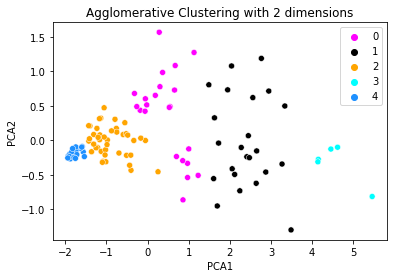

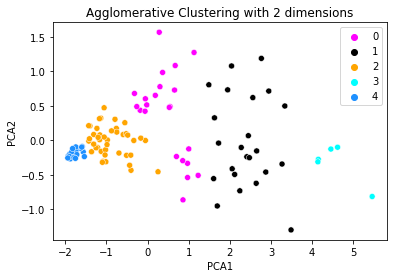

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns

df_mortality_rate = df.loc[df['Indicator Name'] == 'Mortality rate, under-5 (per 1,000 live births)']
df_mortality_rate = df_mortality_rate.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
df_mortality_rate = df_mortality_rate.dropna(how='any')
df_mortality_rate = df_mortality_rate.reset_index(drop=True)
df_mortality_rate = df_mortality_rate.set_index('Country Name')

def f(s):
    return s/s.max()

df_new = df_mortality_rate.apply(f, axis=0)
clustering_agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative = clustering_agglomerative.fit_predict(df_new)

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_comp = 2

reduced_data = PCA(n_components=pca_comp).fit_transform(df_new)
results = pd.DataFrame(reduced_data,columns=['PCA1','PCA2'])

sns.scatterplot(x="PCA1", y="PCA2", hue=agglomerative, data=results,
              palette=['fuchsia','black','orange','cyan','dodgerblue'],
              legend='full',)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.savefig('agglomerative.jpg')
plt.show()

In [13]:
cluster_3 = df_new[clustering_agglomerative.labels_==3] #### selecting countries from cluster number 4
cluster_1 = df_new[clustering_agglomerative.labels_==1] #### selecting countries from cluster number 1
cluster_4 = df_new[clustering_agglomerative.labels_==4] #### selecting countries from cluster number 5

cluster_3.reset_index(inplace = True)
print(cluster_3)

cluster_1.reset_index(inplace = True)
print(cluster_1)

cluster_4.reset_index(inplace = True)
print(cluster_4)


   Country Name      1960      1961      1962      1963      1964      1965  \
0  Burkina Faso  0.804049  0.808138  0.813959  0.821726  0.830581  0.842901   
1        Guinea  0.809867  0.817601  0.826233  0.835213  0.846096  0.859303   
2       Liberia  0.728182  0.740478  0.751865  0.763610  0.775025  0.787289   
3  Sierra Leone  0.907610  0.908919  0.910951  0.913683  0.917668  0.925423   
4   South Sudan  0.820107  0.826591  0.834416  0.842570  0.851852  0.864428   

       1966      1967      1968  ...      2011      2012      2013      2014  \
0  0.859099  0.879413  0.903090  ...  0.760078  0.763747  0.766997  0.750718   
1  0.875691  0.895166  0.917978  ...  0.749675  0.767142  0.783994  0.784483   
2  0.801159  0.816404  0.832022  ...  0.628739  0.639511  0.651558  0.661638   
3  0.934949  0.948398  0.964888  ...  1.000000  1.000000  1.000000  1.000000   
4  0.880169  0.899783  0.921910  ...  0.672952  0.678887  0.696176  0.703305   

       2015      2016      2017      2018   

   Country Name      1960      1961      1962      1963      1964      1965  \
0  Burkina Faso  0.804049  0.808138  0.813959  0.821726  0.830581  0.842901   
1        Guinea  0.809867  0.817601  0.826233  0.835213  0.846096  0.859303   
2       Liberia  0.728182  0.740478  0.751865  0.763610  0.775025  0.787289   
3  Sierra Leone  0.907610  0.908919  0.910951  0.913683  0.917668  0.925423   
4   South Sudan  0.820107  0.826591  0.834416  0.842570  0.851852  0.864428   

       1966      1967      1968  ...      2011      2012      2013      2014  \
0  0.859099  0.879413  0.903090  ...  0.760078  0.763747  0.766997  0.750718   
1  0.875691  0.895166  0.917978  ...  0.749675  0.767142  0.783994  0.784483   
2  0.801159  0.816404  0.832022  ...  0.628739  0.639511  0.651558  0.661638   
3  0.934949  0.948398  0.964888  ...  1.000000  1.000000  1.000000  1.000000   
4  0.880169  0.899783  0.921910  ...  0.672952  0.678887  0.696176  0.703305   

       2015      2016      2017      2018   

C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_1616/2241280794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guinea_df['Year'] = pd.to_numeric(guinea_df["Year"])
C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_1616/2241280794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guinea_df['Year'] = pd.to_numeric(guinea_df["Year"])


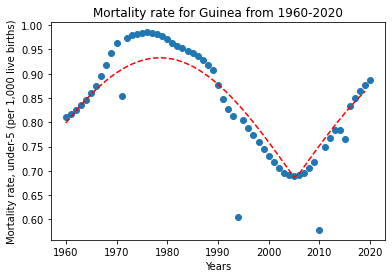

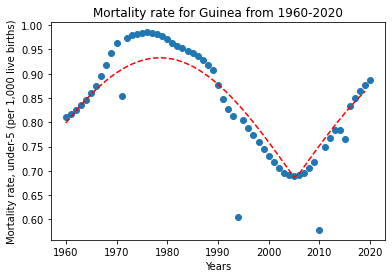

In [14]:
import seaborn as sns
from numpy import sin
from numpy import sqrt
import numpy as np
from numpy import arange
from scipy.optimize import curve_fit


cluster_3_melted = cluster_3.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_3_melted
guinea_df = cluster_3_melted[cluster_3_melted["Country Name"]=="Guinea"]
guinea_df['Year'] = pd.to_numeric(guinea_df["Year"])

# objective function
def func(x, d):
    return 1/4 * np.abs(np.sin(1/17*x - 8)) + d


x = guinea_df["Year"]
y = guinea_df["Value"] 


# curve fit
popt, _ = curve_fit(func, x, y)
d = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, d)

### plotting the curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Mortality rate for Guinea from 1960-2020")
plt.xlabel("Years")
plt.ylabel("Mortality rate, under-5 (per 1,000 live births)")
plt.savefig('guinea.jpg')
plt.show()

C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_1616/2945099524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['Year'] = pd.to_numeric(india_df["Year"])
C:\Users\UDAY KUMAR\anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_1616/2945099524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_df['Year'] = pd.to_numeric(india_df["Year"])

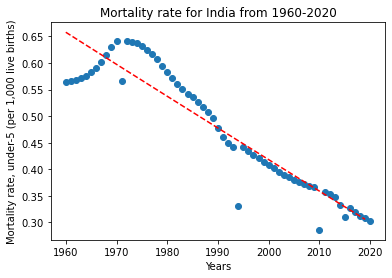

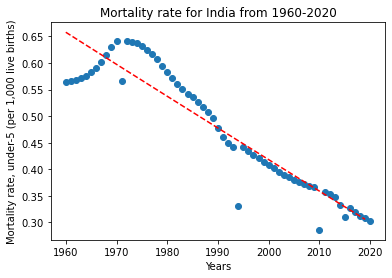

In [15]:
import seaborn as sns
from numpy import sin
from numpy import sqrt
import numpy as np
from scipy.optimize import curve_fit


cluster_1_melted = cluster_1.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_1_melted
india_df = cluster_1_melted[cluster_1_melted["Country Name"]=="India"]
india_df['Year'] = pd.to_numeric(india_df["Year"])


def func(x, a, b, c):
    """Return values from a general log function."""
    return a * np.log(b * x) + c

x = india_df["Year"]
y = india_df["Value"] 

# curve fit
popt, _ = curve_fit(func, x, y)
a,b,c = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, a,b,c)


## plotting the curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Mortality rate for India from 1960-2020")
plt.xlabel("Years")
plt.ylabel("Mortality rate, under-5 (per 1,000 live births)")
plt.savefig('india.jpg')
plt.show()

C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_1616/3258623695.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finland_df['Year'] = pd.to_numeric(finland_df["Year"])
C:\Users\UDAYKU~1\AppData\Local\Temp/ipykernel_1616/3258623695.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finland_df['Year'] = pd.to_numeric(finland_df["Year"])


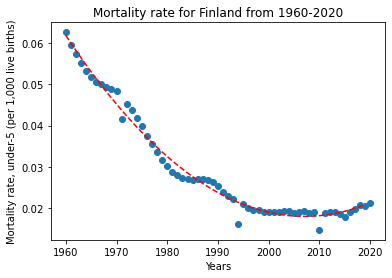

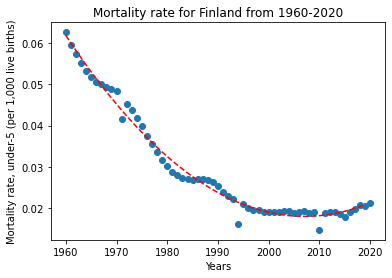

In [16]:
import seaborn as sns
from numpy import sin
from numpy import sqrt
import numpy as np
from scipy.optimize import curve_fit


cluster_4_melted = cluster_4.melt(id_vars=["Country Name"], var_name="Year", value_name="Value")
cluster_4_melted
finland_df = cluster_4_melted[cluster_4_melted["Country Name"]=="Finland"]
finland_df['Year'] = pd.to_numeric(finland_df["Year"])

# objective function
def func(x, a, b, c):
    return a * x + b * x**2 + c


x = finland_df["Year"]
y = finland_df["Value"] 


# curve fit
popt, _ = curve_fit(func, x, y)
a,b,c = popt
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = func(x_line, a,b,c)


## plotting curve fitting
plt.plot(x_line, y_line, '--', color='red')
plt.title("Mortality rate for Finland from 1960-2020")
plt.xlabel("Years")
plt.ylabel("Mortality rate, under-5 (per 1,000 live births)")
plt.savefig('finland.jpg')
plt.show()